<h1 align="center"> Practical Class 2 - Ideal ADC and DAC modelling </h1>

<p align="justify">
The models of an ideal ADC and DAC biased with a Vref voltage and N bits of resolution are presented in this notebook. The covnersion functions of both converters were created using the lambda programming style. Using this style, the creator function for the ADC or DAC receives the 2 fundamental parameters defining these ideal electronic systems:
<ul>
<li>Vref - The reference/biasing voltage of the converter;</li>
<li>Nbits - the number of bits of the converter system (its digital resolution).</li>
</ul>
The converter then returns a function that depending on its input will generate an output code or voltage, for the ADC or DAC, respectively.
</p>

In [1]:
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

# define the function to convert a binary vector to decimal
def bin2dec(x, width):
    """Convert a numpy array from binary to decimal.
    IF the input is an array of binary arrays, 
    the returned output is an array of the corresponding 
    decimals in their corresponding indexes.
    Parameters:
        x: numpy array
        b: base of the number system
    """
    x = np.array(x)
    if x.size == width:
        assert len(x) == width, "The length of the vector must be equal to the number of bits"
        return reduce(lambda x,b: 2*x + b, x)
    assert len(x[0]) == width, "The length of the vector must be equal to the number of bits"
    return np.array(np.array([reduce(lambda xval,b: 2*xval + b, xval) for xval in x]))

def dec2bin(x, width):
    """Convert a numpy array from decimal to binary
    If the input is an array of decimals, the returned 
    binary arrays are the codes corresponding to 
    each decimal in its corresponding index.
    Parameters:
        x: numpy array
        b: base of the number system
    """
    x = np.array(x)
    if x.size == 1:
        return np.array([int(c) for c in np.binary_repr(x, width=width)])
    return np.array([np.array([int(c) for c in np.binary_repr(subx, width=width)]) for subx in x])

# test 
x = np.array([1,0,1,1,0,1])
assert bin2dec(x,6) == 45
x = np.array([1,0,1])
assert bin2dec(x,3) == 5

<h2 align="center"> 1. Digital-to-Analog Converter Modelling </h2>

<p align="justify"> 
This section presents the definition of the ideal model for the 
transfer function of a DAC. The corresponding transfer function 
that is implemented through a lambda programming style can be observed
in (1). There are other possible solutions, such as using an 
object-oriented programming approach by defining a DAC object with 
a "convert" method.
</p>

$$V_{OUT}(D_{in}) = base_{10}\{D_{in}\}*V_{LSB}\hspace{10 pt} (1)$$

where $D_{in}$ is the input binary word of the DAC, $V_{LSB}$ is the Least Significant Bit step voltage and $V_{OUT}$ is the output voltage of the DAC.

In [2]:
# Modelling an ideal Digital to Analog Converter (DAC)
vref = 5 # The biasing voltage of the DAC [V]
n_bits = 3 # The resolution of the ideal DAC
# define the ideal model of a DAC using lambda programming
def ideal_dac(vref:float, n_bits:int):
    """Define the transfer function of an ideal 
    DAC biased by vref and presenting an n_bits resolution.
    Parameters:
        vref (float): The biasing voltage of the electronic system.
        n_bits (int): The resolution of the DAC.
    Returns:
        function(Din): the lambda function defining the transfer function of the DAC
    """
    vlsb = vref/(2**n_bits) # compute the fundamental step voltage between quantized levels
    return lambda x: bin2dec(x, n_bits)*vlsb # return the converter funtion

[0 1 2 3 4 5 6 7]
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
0.625


C:\Users\dasdi\AppData\Local\Temp\ipykernel_15204\1433116757.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(x_bin_str, rotation=45)
C:\Users\dasdi\AppData\Local\Temp\ipykernel_15204\1433116757.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(x_bin_str, rotation=45)


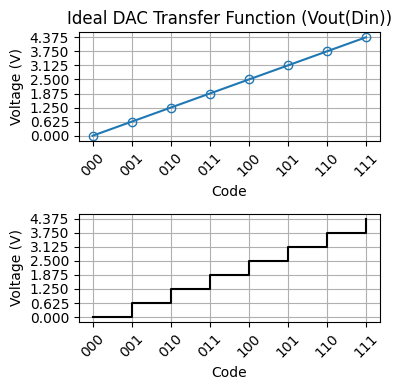

In [15]:
# define the DAC's transfer function
idac = ideal_dac(vref, n_bits)
# define the array of decimal input codes
# belonging to [0, 2^{n_bits}-1]
x = np.arange(2**n_bits)
print(x)
# convert the input codes array 
# from decimal to binary using arrays of 1s and 0s
x_bin = np.array([dec2bin(i, n_bits) for i in x])
# create the string representation of the binary words
x_bin_str = [ "".join([str(num) for num in xv]) for xv in x_bin]
print(x_bin)
print(idac(x_bin[1]))
# get the corresponding output voltages
# of the DAC for each corresponding input code
y = idac(x_bin)
# plot the transfer function of the ideal DAC
fig, ax = plt.subplots(2,1, figsize=(4,4))
ax[0].plot(x_bin_str, y, marker="o", mfc="None") # mfc == marker face color
ax[0].set_xticklabels(x_bin_str, rotation=45)
ax[0].set_yticks(y)
ax[0].set_xlabel('Code')
ax[0].set_ylabel('Voltage (V)')
ax[0].set_title('Ideal DAC Transfer Function (Vout(Din))')
ax[0].grid(True)
ax[1].step(x_bin_str, y, marker="None", color="k", label="floor", where="post")
# note that the step function of the DAC is always a post step!
ax[1].set_xticklabels(x_bin_str, rotation=45)
ax[1].set_yticks(y)
ax[1].set_xlabel('Code')
ax[1].set_ylabel('Voltage (V)')
ax[1].grid(True)
fig.tight_layout()

<h2 align="center"> 2. Analog-to-Digital Converter Modelling </h2>

<p align="justify"> 
This section presents the definition of the ideal model for the 
transfer function of a ADC. The corresponding transfer function 
that is implemented through a lambda programming style can be observed
in (2). Once again, there are other possible solutions, such as using an 
object-oriented programming approach by defining a DAC object with 
a "convert" method.
</p>

$$D_{OUT}(V_{in}, f_{Round}) = base_2\{f_{Round}(V_{in}/V_{LSB})\} \hspace{10 pt} (2)$$

where $V_{in}$ is the input voltage of the ADC, $V_{LSB}$ is the Least Significant Bit step voltage and $D_{OUT}$ is the output digital code of the ADC. $f_{Round}$ is the rounding function that the ADC implements in practice, and this function can be one of three possible solutions: 
<ul>
<li>a) round(.), rounding to the nearest decimal;</li> 
<li>b) ceil(.), rounding to the highest decimal;</li> 
<li>c) floor(.), rounding to the lowest decimal.</li>
</ul>

<p align="justify">
In this case, equation (2) defines an ADC transfer function that returns the output code in the form of a binary digital word, to provide consistency with the presented code below. It is important to note that the the rounding function is parsed as an input to the 
ADC's transfer function for practical, low-code purposes.
</p>

In [16]:
# modelling an ideal ADC
vref = 5 # V
n_bits = 3 # bits
def ideal_adc(vref:float, nbits:int, roundf):
    """Define the transfer function of an ideal 
    ADC biased by vref and presenting an n_bits resolution.
    Parameters:
        vref (float): The biasing voltage of the electronic system.
        n_bits (int): The resolution of the DAC.
        roundf (function): The rounding function to be used.
    Returns:
        function(Vin): the lambda function defining the transfer function of the ADC
    """
    assert roundf in [np.round, np.ceil, np.floor], "The round function must be numpy.floor, numpy.ceil or numpy.round"
    vlsb = vref/(2**nbits)
    return lambda x: dec2bin(roundf(x/vlsb).astype(int), nbits)

[[0 0 0]
 [0 1 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]
['000', '001', '010', '011', '100', '101', '110', '111']


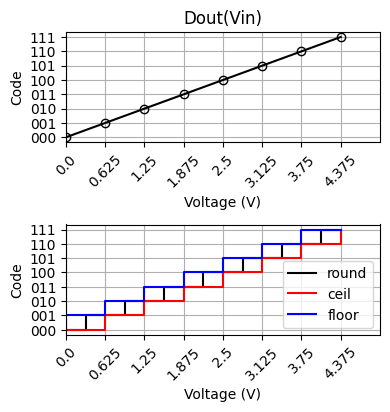

In [18]:
iadc = ideal_adc(vref, n_bits, np.round)
iadc_ceil = ideal_adc(vref, n_bits, np.ceil)
iadc_floor = ideal_adc(vref, n_bits, np.floor)
print(iadc(np.array([0,1,2,3,4])))
x = np.arange(0, vref,vref/2**n_bits)
y = iadc(x)
y_str = [ "".join([str(num) for num in yv]) for yv in y]
print(y_str)
fig, ax = plt.subplots(2,1, figsize=(4,4))
ax[0].plot(x, y_str, marker="o", color="k", mfc="None")
ax[0].set_xticks(x)
ax[0].set_xticklabels(x, rotation=45)
ax[0].set_xlabel('Voltage (V)')
ax[0].set_ylabel('Code')
ax[1].step(x, y_str, marker="None", color="k", label="round", where="mid")
y = iadc_ceil(x)
y_str = [ "".join([str(num) for num in yv]) for yv in y]
ax[1].step(x, y_str, marker="None", color="r", label="ceil", where="post")
ax[1].set_xticks(x)
ax[1].set_xticklabels(x, rotation=45)
ax[1].set_xlabel('Voltage (V)')
ax[1].set_ylabel('Code')
y = iadc_floor(x)
y_str = [ "".join([str(num) for num in yv]) for yv in y]
ax[1].step(x, y_str, marker="None", color="b", label="floor", where="pre")
ax[1].set_xticks(x)
ax[1].set_xticklabels(x, rotation=45)
ax[1].set_xlabel('Voltage (V)')
ax[1].set_ylabel('Code')

ax[0].set_xlim([0, vref])
ax[1].set_xlim([0, vref])
fig.tight_layout()
ax[0].set_title("Dout(Vin)")
ax[0].grid(True)
ax[1].grid(True)
ax[1].legend()